# Pharma Top, Flops and other stuff

In [1]:
import pandas as pd
import mysql.connector
%matplotlib inline
#pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.display.float_format = "{:,.0f}".format

## Connect

In [2]:
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="",
    database = "pharmagelder"
)

## Load Data

In [3]:
df_list_raw = pd.read_sql("""SELECT 
    sum(tra_value) as sum_value,
    trc_name as category,
    pha_name as pharma,
    tra_year as year,
    rec_type as type
  FROM transaction
  LEFT JOIN pharma ON tra_fk_pharma = pha_id
  LEFT JOIN transaction_category on tra_fk_transaction_category = trc_id
  LEFT JOIN recipient ON rec_id = tra_fk_recipient
  GROUP BY tra_fk_pharma, tra_year, tra_fk_transaction_category, rec_type""", con=db_connection)

df_accu_raw = pd.read_sql("""SELECT 
    sum(acc_value) as sum_value,
    trc_name as category,
    pha_name as pharma,
    acc_year as year,
    acc_type as type
  FROM accumulation
  LEFT JOIN pharma ON acc_fk_pharma = pha_id
  LEFT JOIN transaction_category on acc_fk_transaction_category = trc_id
  GROUP BY acc_fk_pharma, acc_year, acc_fk_transaction_category, acc_type""", con=db_connection)


## Export

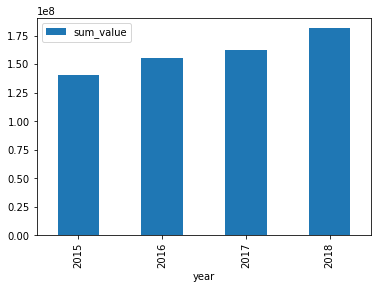

In [4]:
df_list = df_list_raw.copy()
df_accu = df_accu_raw.copy()

#Concat
df_data = pd.concat([df_list, df_accu], sort=False)

df_sum = df_data.groupby('year').sum()

ax = df_sum.plot.bar()
#for i, enum in enumerate(df_sum.iterrows()):
#    ax.text(x = i, y = 0, s=str(round(enum[1]['sum_value'], 0)), color='black', fontweight='bold',
#            horizontalalignment='center',
#           )

In [5]:
df_data[df_data.year==2018].groupby('type').agg({'sum_value': 'sum'})

,sum_value
type,
hco,"96,801,893"
hcp,"12,261,008"
rnd,"72,369,438"


In [5]:
df_sum

,sum_value
year,
2015,"140,514,136"
2016,"155,584,058"
2017,"162,335,403"
2018,"181,432,338"


## Abweichung 2017 - 2018

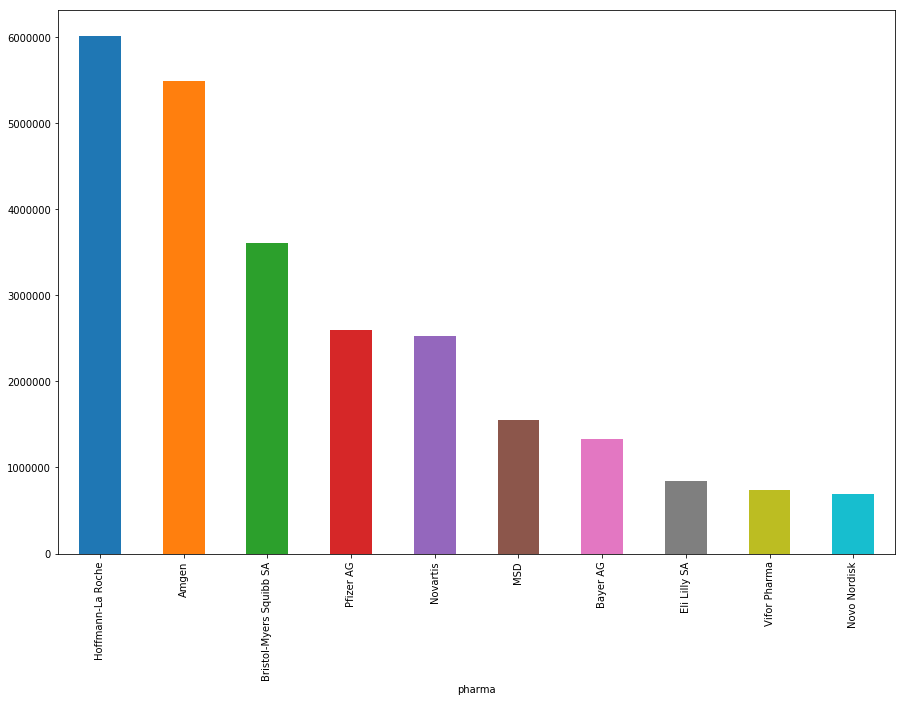

In [52]:
df_grouped = df_data.groupby(['pharma', 'year']).sum().reset_index()

df_pivot = pd.pivot_table(df_grouped, index='pharma', columns='year', values='sum_value')

df_pivot['veraenderung_prozent'] = 100 / df_pivot[2017] * df_pivot[2018]
df_pivot['veraenderung_absolut'] = df_pivot[2018] - df_pivot[2017]

df_pivot = df_pivot.sort_values('veraenderung_absolut', ascending=False)


ax = df_pivot['veraenderung_absolut'].head(10).plot.bar(figsize=(15,10))


In [57]:
df_pivot = df_pivot.sort_values(2018, ascending=False)
df_pivot[[2018, 2017, 'veraenderung_absolut']].head(10)

year,2018,2017,veraenderung_absolut
pharma,,,
Novartis,"22,432,350","19,899,444","2,532,906"
Hoffmann-La Roche,"19,885,075","13,870,678","6,014,397"
Bristol-Myers Squibb SA,"13,662,878","10,054,220","3,608,658"
Bayer AG,"13,332,487","11,996,818","1,335,669"
Pfizer AG,"12,623,917","10,025,838","2,598,079"
Amgen,"11,047,294","5,555,348","5,491,946"
MSD,"10,629,052","9,074,014","1,555,038"
AbbVie,"6,792,351","7,803,013","-1,010,662"
AstraZeneca,"6,674,524","9,790,026","-3,115,502"
